# Intro
https://link.springer.com/chapter/10.1007/978-981-13-8798-2_12

The dataset referenced in this paper contains 520 observations and 17 attributes that are collected
using direct questionnaires and diagnosis results from the patients in the Sylhet Diabetes Hospital
in Sylhet, Bangladesh. There are 2 demographic features, Age & Gender; the other 15 attributes
are binary features that indicate whether the patient experienced a symptom

By the due date of milestone report on 10/23, we should be able to reproduce the results from the first
paper. For the milestone report, we will each tackle an algorithm and attempt to reproduce the results
from (Islam et al. 2020). With the exception of Decision Tree/Random Forest, this corresponds with
the material taught on the syllabus.

## Explore

In [1]:
import seaborn as sns
import pandas as pd
sylhet_raw = pd.read_csv('../data/sylhet-dataset.csv')
sylhet_copy = sylhet_raw.copy(deep = True)

In [2]:
sylhet_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Age                 520 non-null    int64 
 1   Gender              520 non-null    object
 2   Polyuria            520 non-null    object
 3   Polydipsia          520 non-null    object
 4   sudden weight loss  520 non-null    object
 5   weakness            520 non-null    object
 6   Polyphagia          520 non-null    object
 7   Genital thrush      520 non-null    object
 8   visual blurring     520 non-null    object
 9   Itching             520 non-null    object
 10  Irritability        520 non-null    object
 11  delayed healing     520 non-null    object
 12  partial paresis     520 non-null    object
 13  muscle stiffness    520 non-null    object
 14  Alopecia            520 non-null    object
 15  Obesity             520 non-null    object
 16  class               520 no

In [3]:
sylhet_copy.describe(include='all')

,Age,Gender,Polyuria,Polydipsia,sudden weight loss,weakness,Polyphagia,Genital thrush,visual blurring,Itching,Irritability,delayed healing,partial paresis,muscle stiffness,Alopecia,Obesity,class
count,520.000000,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520,520
unique,NaN,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
top,NaN,Male,No,No,No,Yes,No,No,No,No,No,No,No,No,No,No,Positive
freq,NaN,328,262,287,303,305,283,404,287,267,394,281,296,325,341,432,320
mean,48.028846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,12.151466,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,16.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,39.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,47.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,57.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
col_names = [x.lower().replace(' ','_') for x in sylhet_copy.columns]

In [5]:
print(col_names)

['age', 'gender', 'polyuria', 'polydipsia', 'sudden_weight_loss', 'weakness', 'polyphagia', 'genital_thrush', 'visual_blurring', 'itching', 'irritability', 'delayed_healing', 'partial_paresis', 'muscle_stiffness', 'alopecia', 'obesity', 'class']


In [7]:
sylhet_copy.set_axis(col_names, axis=1, inplace=True)

In [8]:
for x in col_names[1:-1]:
    sylhet_copy[x] = sylhet_copy[x].apply(lambda z: 0 if z=='No' else 1)

In [9]:
sylhet_copy.describe(include='all')

,age,gender,polyuria,polydipsia,sudden_weight_loss,weakness,polyphagia,genital_thrush,visual_blurring,itching,irritability,delayed_healing,partial_paresis,muscle_stiffness,alopecia,obesity,class
count,520.000000,520.0,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520.000000,520
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Positive
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,320
mean,48.028846,1.0,0.496154,0.448077,0.417308,0.586538,0.455769,0.223077,0.448077,0.486538,0.242308,0.459615,0.430769,0.375000,0.344231,0.169231,NaN
std,12.151466,0.0,0.500467,0.497776,0.493589,0.492928,0.498519,0.416710,0.497776,0.500300,0.428892,0.498846,0.495661,0.484589,0.475574,0.375317,NaN
min,16.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
25%,39.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
50%,47.500000,1.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,NaN
75%,57.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,NaN


<AxesSubplot:xlabel='age', ylabel='Count'>

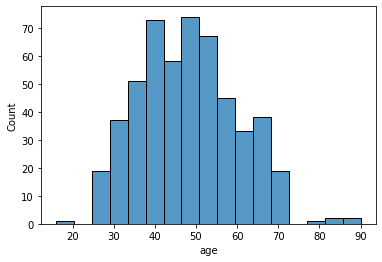

In [10]:
sns.histplot(sylhet_copy,x='age')

In [11]:
sylhet_copy['class'].value_counts()

Positive    320
Negative    200
Name: class, dtype: int64

In [12]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

sylhet_copy['class'] = le.fit_transform(sylhet_copy['class'])

In [13]:
sylhet_copy['class'].mean()

0.6153846153846154